In [1]:
import time
from random import randint

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
from tensorflow.examples.tutorials.mnist import input_data



In [0]:
class SimpleConvAutoEncoder(tf.keras.Model):
    def __init__(self):
        super(SimpleConvAutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10) # no activation
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(10,)),
                tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(7,7,32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=64,
                    kernel_size=3,
                    strides=(2,2),
                    padding = 'SAME',
                    activation='relu'
                ),
                tf.keras.layers.Conv2DTranspose(
                    filters=32,
                    kernel_size=3,
                    strides=(2, 2),
                    padding='SAME',
                    activation='relu'
                ),
                tf.keras.layers.Conv2DTranspose(
                    filters=1,
                    kernel_size=3,
                    strides=(1, 1),
                    padding='SAME',
                ),
            ]
        )
    def Encode(self, x):
        return self.encoder(x)

    def Decode(self, x):
        logits = self.decoder(x)
        return tf.sigmoid(logits)


In [0]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model.Decode(test_input)
  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()



In [0]:

def train_and_save_results(train_set, test_set):
    epochs = 10
    optimizer =tf.keras.optimizers.Adam()
    model = SimpleConvAutoEncoder()
    for epoch in range(1, epochs + 1):
        start_time = time.time()
        for train_x in train_set:
            print(np.sum(compute_loss(model, train_x)))
            compute_apply_gradients(model, train_x, optimizer)
        end_time = time.time()
        loss = np.inf
        if epoch:
            for test_x in test_set:
                loss = np.sum(compute_loss(model, test_x))
            display.clear_output(wait=False)
            print('Epoch: {}, Test set ELBO: {}, '
                  'time elapse for current epoch {}'.format(epoch,
                                                            loss,
                                                            end_time - start_time))
        
        generate_and_save_images(model, epoch, random_vector_for_generation)


In [0]:
# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.



In [0]:
@tf.function
def compute_loss(model : SimpleConvAutoEncoder,x_real):
    z = model.Encode(x_real)
    logits = model.decoder(z)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=x_real)
    return tf.reduce_mean(loss)


In [0]:
@tf.function
def compute_apply_gradients(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [0]:

def load_data():
    TRAIN_BUF = 60000
    BATCH_SIZE = 100
    TEST_BUF = 10000
    (train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

    # Normalizing the images to the range of [0., 1.]
    train_images /= 255.
    test_images /= 255.
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
    test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(TEST_BUF).batch(BATCH_SIZE)
    return train_dataset ,test_dataset

Epoch: 1, Test set ELBO: 0.12879371643066406, time elapse for current epoch 107.04516172409058


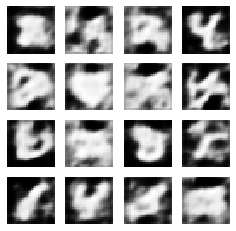

0.13145824
0.12042084
0.120501235
0.12688294
0.12049067
0.121809095
0.12139397
0.11949503
0.12612024
0.12356109
0.12712833
0.11577622
0.12536639
0.12236874
0.11798482
0.12910527
0.12259061
0.12509169
0.11898505
0.12309284
0.11887559
0.11760733
0.121708326
0.1238104
0.12004564
0.12462112
0.12496168
0.12536483
0.13008972
0.12285495
0.12335001
0.12861861
0.12688537
0.11879001
0.1277583
0.124355085
0.125694
0.12977135
0.123047836
0.123996384
0.12562144
0.11508256
0.11824028
0.12992802
0.13350521
0.12840985
0.12515551
0.12566409
0.1278096
0.11373334
0.124345675
0.123318024
0.12472304
0.12420313
0.121520884
0.12663296
0.12907216
0.11763106
0.12515093
0.12575449
0.121999934
0.117224485
0.124410965
0.12381041
0.11547802
0.12592663
0.13430652
0.12697041
0.120510705
0.1276065
0.11842481
0.12602216
0.122989506
0.118634485
0.122046195
0.12280839
0.12954465
0.1224712
0.11662964
0.1231861
0.11977636
0.11873774
0.12871686
0.12603673
0.124811314
0.123133905
0.12742823
0.13061538
0.12037384
0.124095984

In [0]:

tf.enable_eager_execution()
random_vector_for_generation = tf.random.normal(
    shape=[16, 10])
print(tf.version)
train_dataset, test_dataset = load_data()
train_and_save_results(train_dataset, test_dataset)
